# Task 1: Exploratory Data Analysis (EDA) and Business Insights

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customers = pd.read_csv('Customers.csv')
prducts = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

In [5]:
print(customers.columns)
print(prducts.columns)
print(transactions.columns)

Index(['CustomerID', 'CustomerName', 'Region', 'SignupDate'], dtype='object')
Index(['ProductID', 'ProductName', 'Category', 'Price'], dtype='object')
Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price'],
      dtype='object')


In [11]:
print('Information of Customers\n')
print(customers.describe())
print('\n')
print("Info of Products\n")
print(prducts.describe())
print('\n')
print("Info of Transactions\n")
print(transactions.describe())

Information of Customers

       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3


Info of Products

            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000


Info of Transactions

          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497.76000


In [12]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [24]:
print("Total transaction amount: " , transactions['Price'].sum())

Total transaction amount:  272554.07


In [14]:
# merging customers and products on their respective CustomerID and ProductID
merged_data = transactions.merge(customers, on='CustomerID').merge(prducts, on='ProductID')

In [15]:
# Missing values

print("Missing values:\n", merged_data.isnull().sum())

Missing values:
 TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price_x            0
CustomerName       0
Region             0
SignupDate         0
ProductName        0
Category           0
Price_y            0
dtype: int64


In [16]:
print(merged_data.describe())

          Quantity   TotalValue     Price_x     Price_y
count  1000.000000  1000.000000  1000.00000  1000.00000
mean      2.537000   689.995560   272.55407   272.55407
std       1.117981   493.144478   140.73639   140.73639
min       1.000000    16.080000    16.08000    16.08000
25%       2.000000   295.295000   147.95000   147.95000
50%       3.000000   588.880000   299.93000   299.93000
75%       4.000000  1011.660000   404.40000   404.40000
max       4.000000  1991.040000   497.76000   497.76000


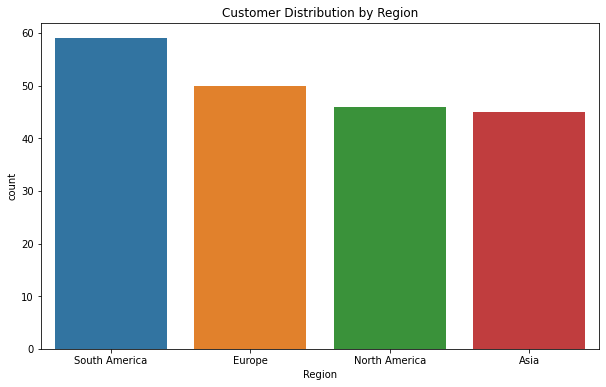

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(data=customers, x='Region', order=customers['Region'].value_counts().index)
plt.title('Customer Distribution by Region')
plt.show()

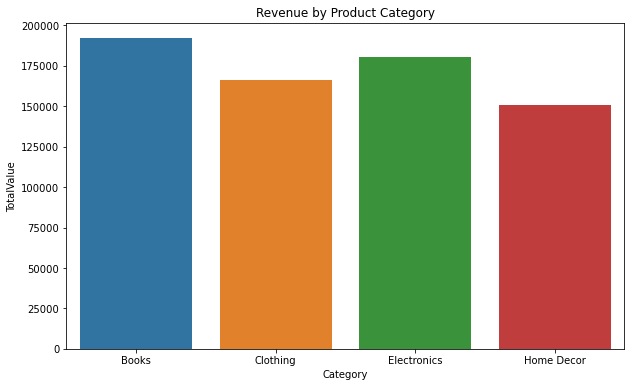

In [18]:
plt.figure(figsize=(10, 6))
sns.barplot(data=merged_data.groupby('Category')['TotalValue'].sum().reset_index(),
            x='Category', y='TotalValue')
plt.title('Revenue by Product Category')
plt.show()

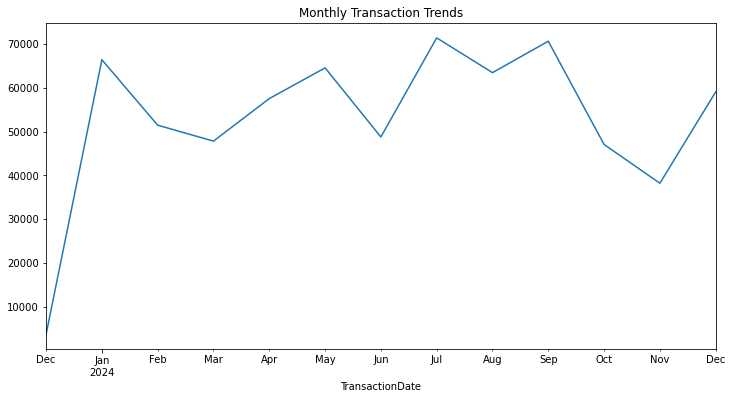

In [19]:
merged_data.groupby(merged_data['TransactionDate'].dt.to_period('M')).sum()['TotalValue'].plot(
    figsize=(12, 6), title='Monthly Transaction Trends')
plt.show()

### Business Insights

1. High revenue comes from customers in South America.
2. Books contributes most for sales.
3. Most transactions occurs in July 2024 month.
4. Total transaction amount is 272554.07.
5. High-value transactions comes from Books buyers.